# **Deep HW3**

**Pantea Amoie    400101656**

### Q1
#### Part a

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


100%|██████████| 170M/170M [00:12<00:00, 13.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


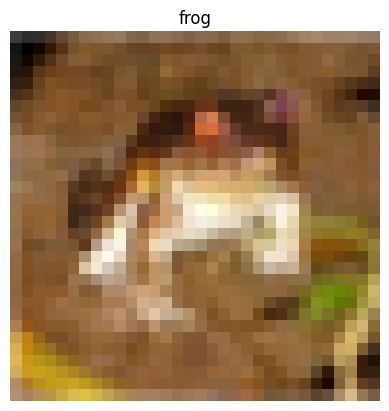

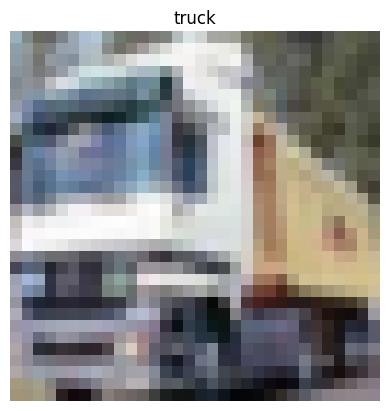

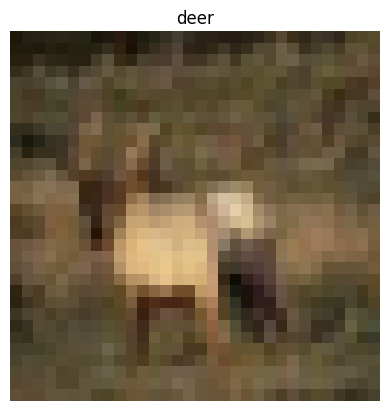

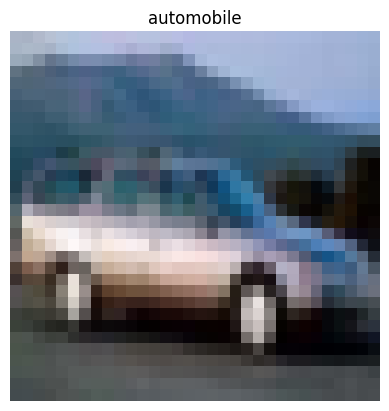

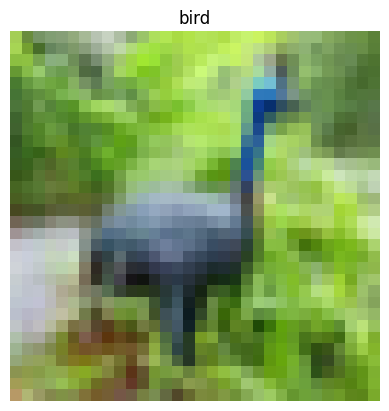

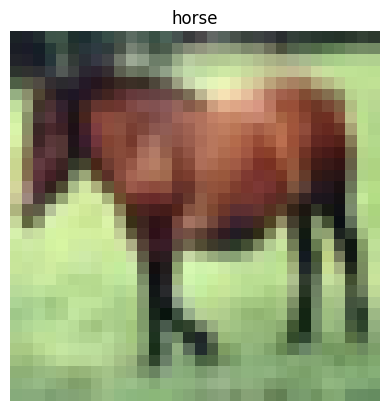

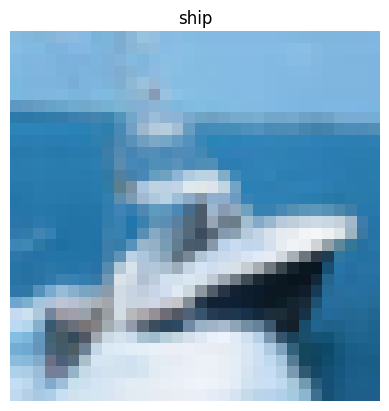

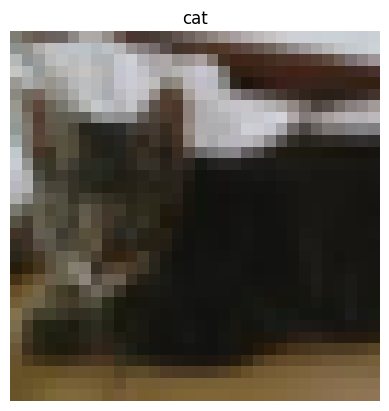

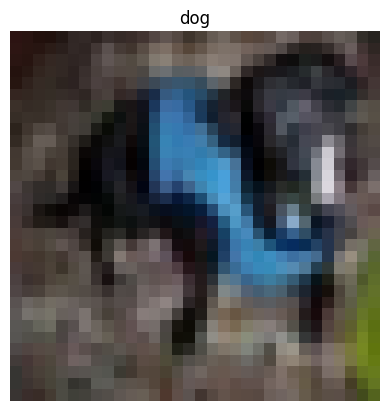

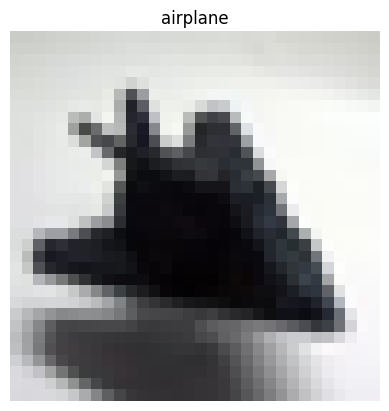

In [2]:
# Normalization and data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizing to [-1, 1]
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_set, val_set = torch.utils.data.random_split(train_dataset, [40000, 10000])



# Function to unnormalize and display an image
def imshow(img, label):
    img = img / 2 + 0.5  # Unnormalizing to [0, 1]
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.title(label)
    plt.axis('off')
    plt.show()

# One image from each label
classes = train_dataset.classes
label_map = {i: False for i in range(10)}  # To track labels we have found
for img, label in train_dataset:
    if not label_map[label]:  # If we haven't displayed this label yet
        imshow(img, classes[label])
        label_map[label] = True
    if all(label_map.values()):  # Stop once we have one of each label
        break



#### Part b

In [3]:
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 14 * 14, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [4]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BaselineModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training
num_epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    current_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    train_losses.append(current_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Validation phase
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%')

# Saving the best model
torch.save(model.state_dict(), 'best_model_b.pth')


Epoch 1/30, Train Loss: 1.4826, Train Acc: 48.13%, Val Loss: 1.2797, Val Acc: 55.53%
Epoch 2/30, Train Loss: 1.1768, Train Acc: 59.38%, Val Loss: 1.1429, Val Acc: 60.51%
Epoch 3/30, Train Loss: 1.0656, Train Acc: 63.68%, Val Loss: 1.1052, Val Acc: 61.95%
Epoch 4/30, Train Loss: 1.0011, Train Acc: 65.88%, Val Loss: 1.1475, Val Acc: 61.44%
Epoch 5/30, Train Loss: 0.9446, Train Acc: 67.56%, Val Loss: 1.1125, Val Acc: 63.01%
Epoch 6/30, Train Loss: 0.9106, Train Acc: 68.93%, Val Loss: 1.1096, Val Acc: 63.15%
Epoch 7/30, Train Loss: 0.8639, Train Acc: 70.41%, Val Loss: 1.1729, Val Acc: 62.15%
Epoch 8/30, Train Loss: 0.8420, Train Acc: 71.29%, Val Loss: 1.1876, Val Acc: 62.17%
Epoch 9/30, Train Loss: 0.8057, Train Acc: 72.74%, Val Loss: 1.1364, Val Acc: 63.54%
Epoch 10/30, Train Loss: 0.7742, Train Acc: 73.45%, Val Loss: 1.1641, Val Acc: 63.13%
Epoch 11/30, Train Loss: 0.7511, Train Acc: 74.43%, Val Loss: 1.2052, Val Acc: 63.00%
Epoch 12/30, Train Loss: 0.7258, Train Acc: 75.22%, Val Loss: 1

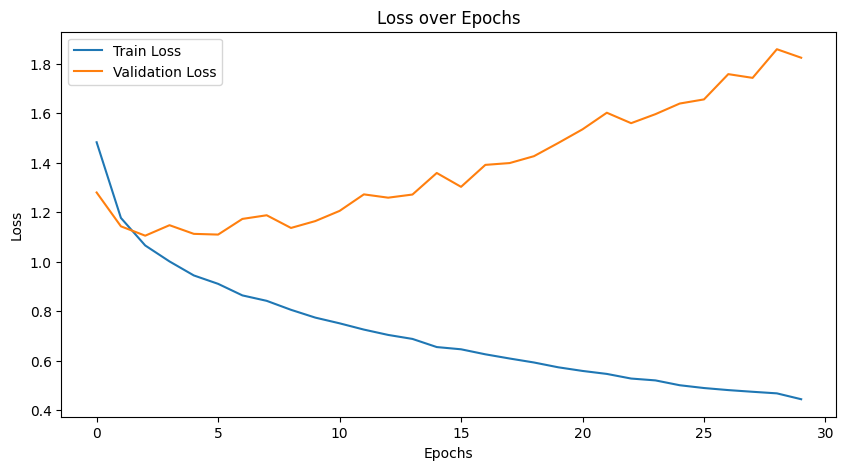

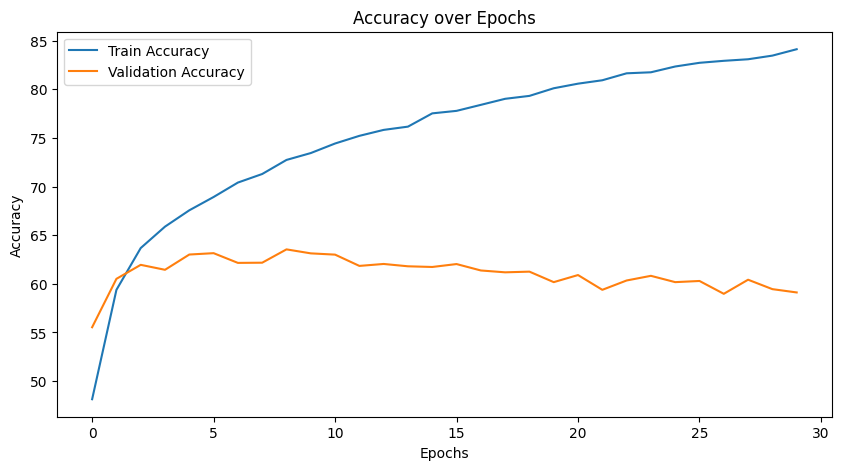

In [5]:

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Part c

In [8]:
def train_and_evaluate_model(model, train_set, val_set, test_dataset, batch_size=64, num_epochs=30, lr=0.01, momentum=0.9, save_path=None):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    # For storing results
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        current_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            current_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_losses.append(current_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Validation phase
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")

    # Save the best model
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

    return {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "train_accuracies": train_accuracies,
        "val_accuracies": val_accuracies
    }


In [9]:
def plot_training_results(results):

  train_losses = results["train_losses"]
  val_losses = results["val_losses"]
  train_accuracies = results["train_accuracies"]
  val_accuracies = results["val_accuracies"]

  plt.figure(figsize=(10, 5))
  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.title('Loss over Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 5))
  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')
  plt.title('Accuracy over Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [10]:
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)


        self.relu = nn.ReLU()
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = torch.flatten(x, 1)  # Flatten for FC layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation for final layer (because softmax is integrated into CrossEntropyLoss)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_c = EnhancedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_c.parameters(), lr=0.01, momentum=0.9)

results = train_and_evaluate_model(model_c, train_set, val_set, test_dataset, batch_size=64, num_epochs=30, save_path="best_model_c.pth")


Epoch 1/30, Train Loss: 2.0994, Train Acc: 20.75%, Val Loss: 1.7205, Val Acc: 35.17%
Epoch 2/30, Train Loss: 1.5159, Train Acc: 43.91%, Val Loss: 1.4180, Val Acc: 46.97%
Epoch 3/30, Train Loss: 1.2163, Train Acc: 55.68%, Val Loss: 1.0915, Val Acc: 60.01%
Epoch 4/30, Train Loss: 0.9752, Train Acc: 65.31%, Val Loss: 0.9261, Val Acc: 67.08%
Epoch 5/30, Train Loss: 0.8163, Train Acc: 71.13%, Val Loss: 0.9153, Val Acc: 68.12%
Epoch 6/30, Train Loss: 0.6781, Train Acc: 76.04%, Val Loss: 0.8565, Val Acc: 69.93%
Epoch 7/30, Train Loss: 0.5699, Train Acc: 80.01%, Val Loss: 0.8043, Val Acc: 72.20%
Epoch 8/30, Train Loss: 0.4834, Train Acc: 83.06%, Val Loss: 0.7633, Val Acc: 74.59%
Epoch 9/30, Train Loss: 0.3871, Train Acc: 86.36%, Val Loss: 0.7820, Val Acc: 74.57%
Epoch 10/30, Train Loss: 0.3213, Train Acc: 88.86%, Val Loss: 0.7893, Val Acc: 75.07%
Epoch 11/30, Train Loss: 0.2613, Train Acc: 90.78%, Val Loss: 0.9231, Val Acc: 73.71%
Epoch 12/30, Train Loss: 0.2134, Train Acc: 92.32%, Val Loss: 1

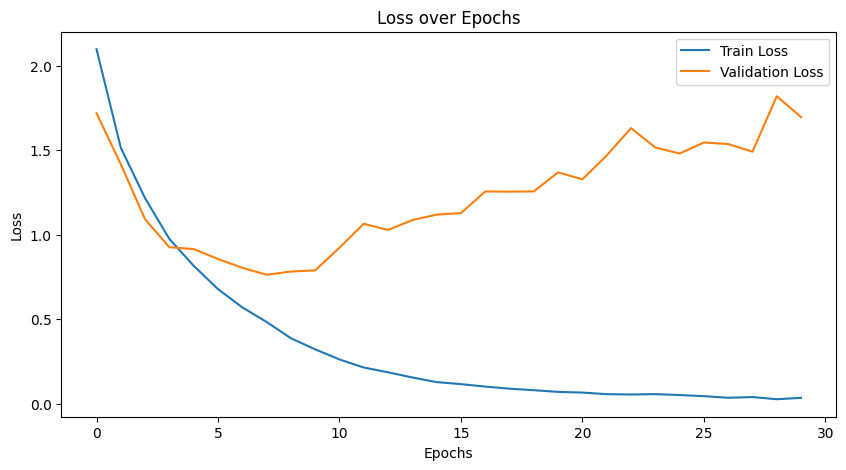

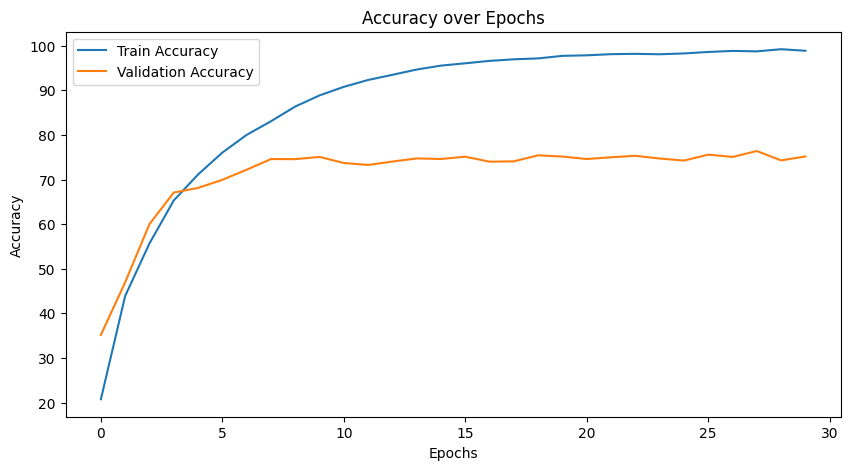

In [11]:
plot_training_results(results)

As we can see, there is an improvement in the results. Adding more layers allows the model to learn more abstract and hierarchical features. Early layers capture low-level features (edges, textures), while deeper layers learn more complex patterns (shapes, objects). Also more filters in each convolutional layer help extract more detailed and diverse features from the input data. Therefore, this improves feature extraction, which translates to better learning and accuracy.

#### Part d

In [12]:
class EnhancedCNNWithBN(nn.Module):
    def __init__(self):
        super(EnhancedCNNWithBN, self).__init__()

        # Convolutional layers with Batch Normalization
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.relu = nn.ReLU()
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_d = EnhancedCNNWithBN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_d.parameters(), lr=0.01, momentum=0.9)

results = train_and_evaluate_model(model_d, train_set, val_set, test_dataset, batch_size=64, num_epochs=30, save_path="best_model_d.pth")


Epoch 1/30, Train Loss: 1.3201, Train Acc: 51.75%, Val Loss: 1.0540, Val Acc: 62.95%
Epoch 2/30, Train Loss: 0.8996, Train Acc: 68.24%, Val Loss: 0.8848, Val Acc: 68.55%
Epoch 3/30, Train Loss: 0.7188, Train Acc: 74.84%, Val Loss: 0.7742, Val Acc: 73.16%
Epoch 4/30, Train Loss: 0.6062, Train Acc: 78.62%, Val Loss: 0.6977, Val Acc: 75.38%
Epoch 5/30, Train Loss: 0.5134, Train Acc: 82.01%, Val Loss: 0.7634, Val Acc: 73.82%
Epoch 6/30, Train Loss: 0.4230, Train Acc: 85.15%, Val Loss: 0.7707, Val Acc: 75.11%
Epoch 7/30, Train Loss: 0.3553, Train Acc: 87.58%, Val Loss: 0.7673, Val Acc: 75.84%
Epoch 8/30, Train Loss: 0.2991, Train Acc: 89.60%, Val Loss: 0.8185, Val Acc: 76.22%
Epoch 9/30, Train Loss: 0.2423, Train Acc: 91.52%, Val Loss: 1.0101, Val Acc: 73.21%
Epoch 10/30, Train Loss: 0.2019, Train Acc: 92.98%, Val Loss: 0.9008, Val Acc: 76.58%
Epoch 11/30, Train Loss: 0.1730, Train Acc: 93.94%, Val Loss: 0.8861, Val Acc: 76.43%
Epoch 12/30, Train Loss: 0.1373, Train Acc: 95.14%, Val Loss: 0

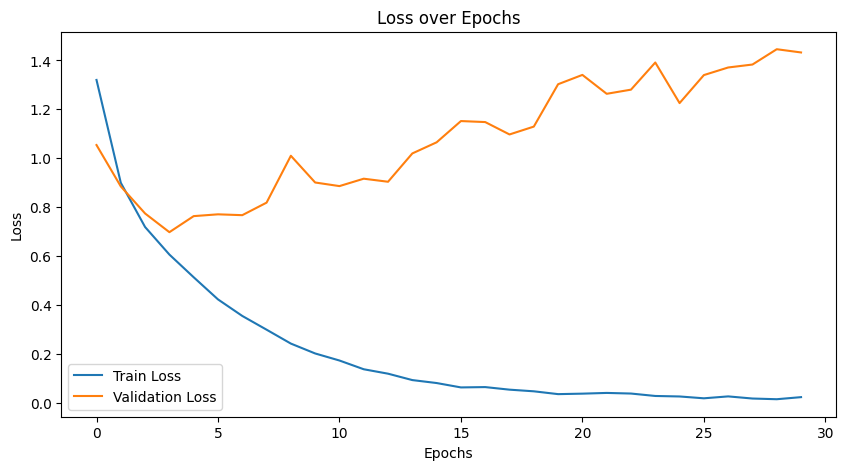

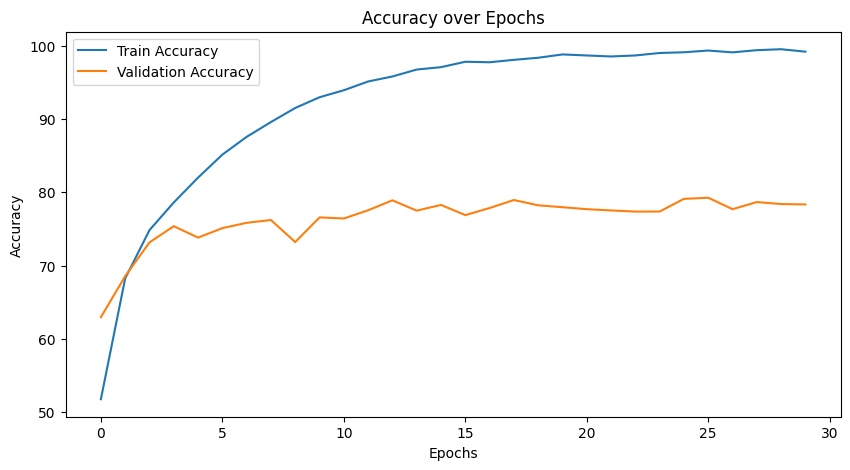

In [13]:
plot_training_results(results)

Batch Normalization (BN) normalizes the input to each layer, reducing internal covariate shift by ensuring that the distribution of activations remains consistent across the network during training. This stabilization of activations makes the training process smoother, allowing for faster convergence. By adding a small amount of noise to the network, BN acts as a regularizer, reducing overfitting and improving the model’s ability to generalize to new data. BN also reduces the model’s sensitivity to weight initialization, meaning that it can use higher learning rates without experiencing instability, thus speeding up the training process.

The introduction of BN in our previous model helped to stabilize the training, leading to a more robust learning process. It caused improved performance by reducing the risk of overfitting, making the model more adaptable to unseen data. This explains the improvement in the results and accuracies.

#### Part e

In [17]:
class EnhancedCNNWithDropout(nn.Module):
    def __init__(self):
        super(EnhancedCNNWithDropout, self).__init__()

        # Convolutional layers with Batch Normalization
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.relu = nn.ReLU()
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers with dropout
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_e = EnhancedCNNWithDropout().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_e.parameters(), lr=0.01, momentum=0.9)

results = train_and_evaluate_model(model_e, train_set, val_set, test_dataset, batch_size=64, num_epochs=30, save_path="best_model_e.pth")

Epoch 1/30, Train Loss: 1.5173, Train Acc: 43.39%, Val Loss: 1.2218, Val Acc: 56.45%
Epoch 2/30, Train Loss: 1.1437, Train Acc: 59.28%, Val Loss: 0.9847, Val Acc: 66.22%
Epoch 3/30, Train Loss: 0.9712, Train Acc: 66.22%, Val Loss: 0.8781, Val Acc: 68.81%
Epoch 4/30, Train Loss: 0.8561, Train Acc: 70.66%, Val Loss: 0.8771, Val Acc: 70.33%
Epoch 5/30, Train Loss: 0.7501, Train Acc: 74.70%, Val Loss: 0.8098, Val Acc: 72.89%
Epoch 6/30, Train Loss: 0.6765, Train Acc: 76.72%, Val Loss: 0.7622, Val Acc: 73.55%
Epoch 7/30, Train Loss: 0.6052, Train Acc: 79.55%, Val Loss: 0.7935, Val Acc: 73.08%
Epoch 8/30, Train Loss: 0.5362, Train Acc: 81.78%, Val Loss: 0.7366, Val Acc: 75.70%
Epoch 9/30, Train Loss: 0.4863, Train Acc: 83.46%, Val Loss: 0.6864, Val Acc: 77.42%
Epoch 10/30, Train Loss: 0.4332, Train Acc: 85.31%, Val Loss: 0.6667, Val Acc: 78.62%
Epoch 11/30, Train Loss: 0.3809, Train Acc: 87.12%, Val Loss: 0.6919, Val Acc: 78.34%
Epoch 12/30, Train Loss: 0.3329, Train Acc: 88.83%, Val Loss: 0

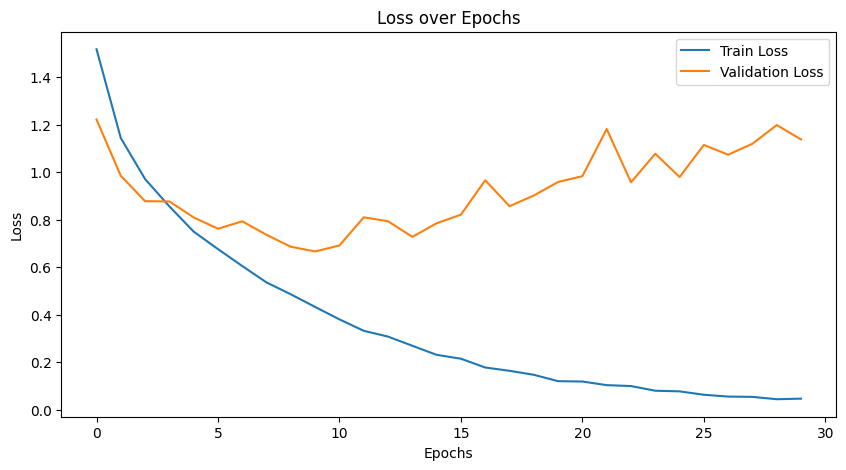

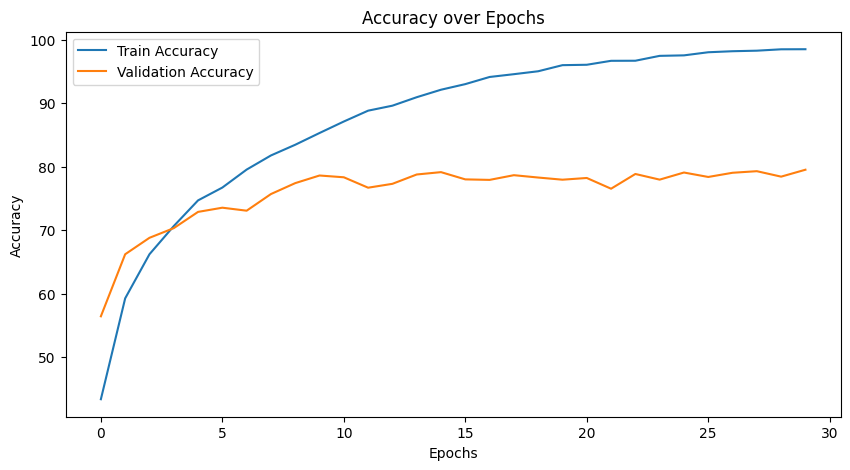

In [18]:
plot_training_results(results)

Dropout randomly disables a fraction of neurons during training, forcing the network to learn redundant representations. This reduces the dependency on specific neurons and enhances the network’s ability to generalize to unseen data. By introducing noise during training, Dropout also helps the model to avoid overfitting, as it prevents the network from becoming too reliant on particular features or activations. As a result, the network is encouraged to learn more robust and distributed representations of the data.

On the other hand, Batch Normalization (BN) reduces internal covariate shift by normalizing the input to each layer, making the training process more stable and speeding up convergence. It helps to mitigate the effects of vanishing/exploding gradients by maintaining a consistent distribution of activations across the network layers.

When used together, Dropout and BN complement each other to improve the model’s generalization and robustness. While BN ensures stable training, Dropout introduces regularization by preventing overfitting. In our case, the observed increase in validation accuracy and slight decrease in training accuracy after adding Dropout suggests that the model is effectively learning to generalize better to unseen data. The slight drop in training accuracy indicates that the model is not memorizing the training set, which is a good sign of improved generalization. These combined techniques have enhanced the network's ability to perform well on both training and validation data, leading to a more robust and efficient model overall.

#### Part f

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_on_test(model, test_loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    test_accuracy = accuracy_score(all_labels, all_preds)

    return cm, test_accuracy

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


<ipython-input-20-b5461be08c2d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_b.pth"))


Test Accuracy of Baseline Model: 58.82%


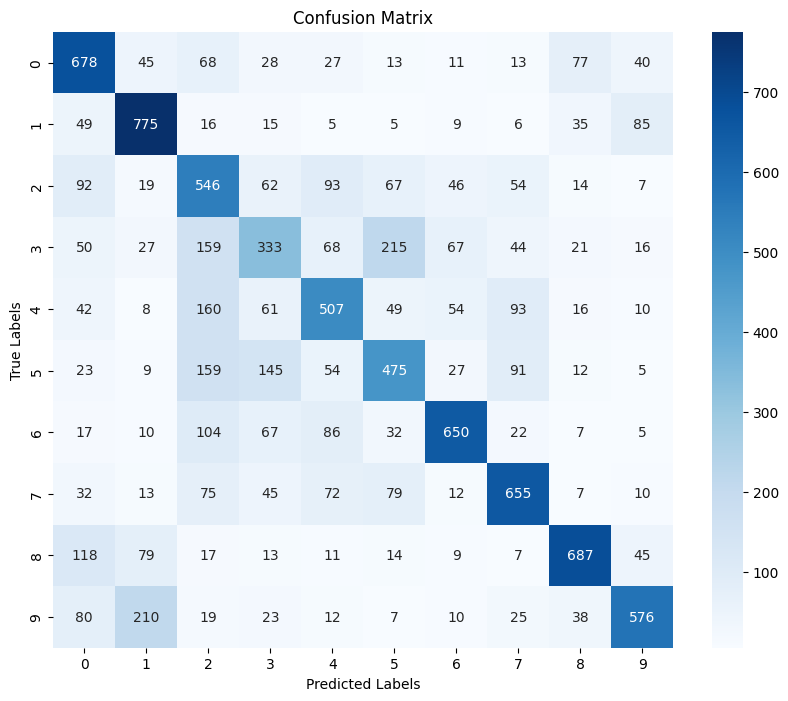

In [20]:
model = BaselineModel().to(device)
model.load_state_dict(torch.load("best_model_b.pth"))

cm, test_accuracy = evaluate_on_test(model, test_loader)
print(f"Test Accuracy of Baseline Model: {test_accuracy * 100:.2f}%")

class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, class_names)

<ipython-input-21-dfc037af1433>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_c.pth"))


Test Accuracy of Enhanced Model: 74.63%


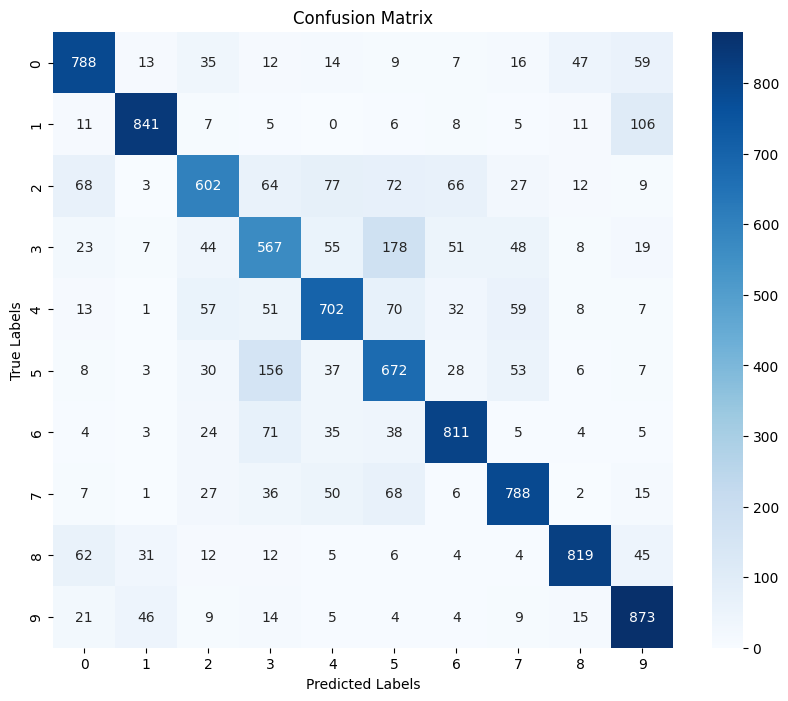

In [21]:
model = EnhancedCNN().to(device)
model.load_state_dict(torch.load("best_model_c.pth"))

cm, test_accuracy = evaluate_on_test(model, test_loader)
print(f"Test Accuracy of Enhanced Model: {test_accuracy * 100:.2f}%")

class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, class_names)

<ipython-input-22-8f47271566a4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_d.pth"))


Test Accuracy of Enhanced Model With BN: 78.15%


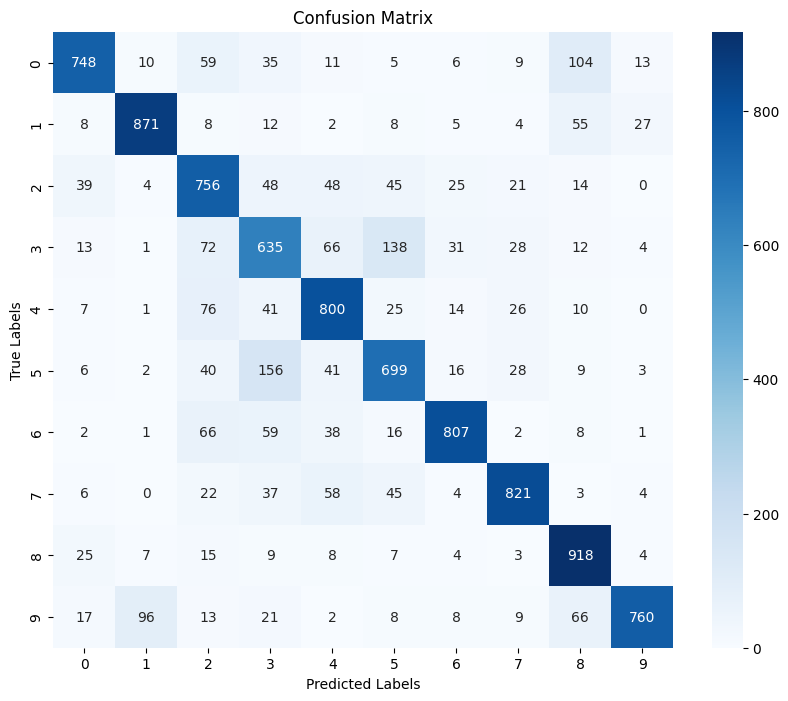

In [22]:
model = EnhancedCNNWithBN().to(device)
model.load_state_dict(torch.load("best_model_d.pth"))

cm, test_accuracy = evaluate_on_test(model, test_loader)
print(f"Test Accuracy of Enhanced Model With BN: {test_accuracy * 100:.2f}%")

class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, class_names)

<ipython-input-23-456dd1e7e500>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_e.pth"))


Test Accuracy of Enhanced Model With BN and Dropout: 79.30%


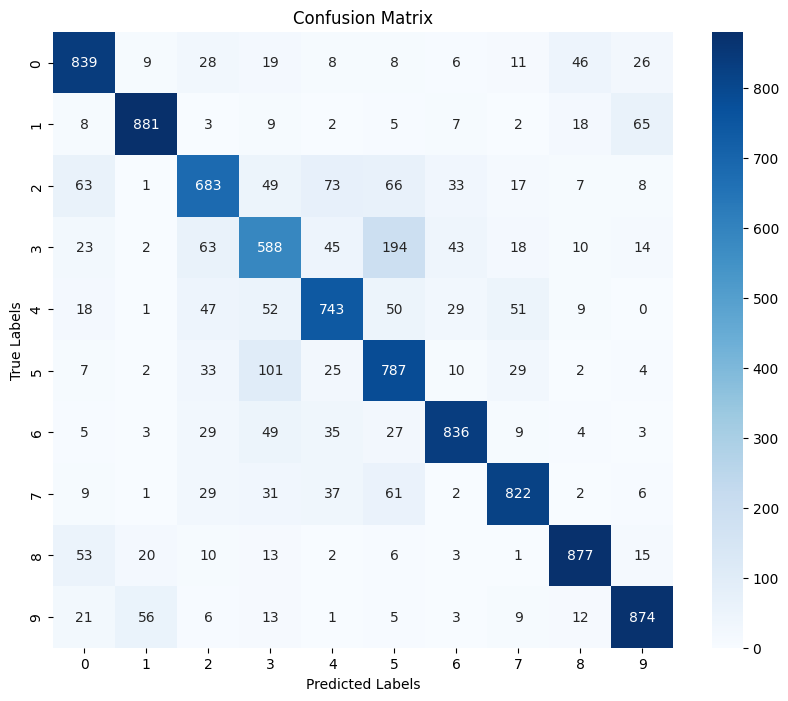

In [23]:
model = EnhancedCNNWithBN().to(device)
model.load_state_dict(torch.load("best_model_e.pth"))

cm, test_accuracy = evaluate_on_test(model, test_loader)
print(f"Test Accuracy of Enhanced Model With BN and Dropout: {test_accuracy * 100:.2f}%")

class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, class_names)

As we expected, the performance and accuracy improved at each step, demonstrating that:

**Accuracy Ranking:**
- Model with Batch Normalization and Dropout > Model with BN > Enhanced Model > Baseline Model
